<a href="https://colab.research.google.com/github/SarvinSaravi/Artificial-Neural-Network/blob/main/neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuron Intro
P.1 Intro and Neuron Code (Perceptron without an activation function)

In [15]:
inputs = [1.2, 5.2, 2.1]
weights = [3.1, 2.1, 8.7]

bias = 3

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

35.91


# Layer
 P.2 Coding a Layer: a layer that poses 3 neurons and gets 4 inputs

In [2]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]

print(output)

[4.8, 1.21, 2.385]


# Dot Product
P.3 The Dot Product/Matrix Product + **Numpy** + Understanding Shape

In [3]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]


layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, biases):
  neuron_output = 0
  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input*weight
  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

print(layer_outputs)


[4.8, 1.21, 2.385]


In [4]:
import numpy as np

inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
biases = 2

# output = np.dot(inputs, weights) + biases
output = np.dot(weights, inputs) + biases
print(output)

4.8


In [5]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

output = np.dot(weights, inputs) + biases

"""
output = np.dot(inputs, weights) + biases ===============> throws error becase of SHAPE
output = np.dot(inputs, np.array(weights).T) + biases
"""

print(output)

[4.8   1.21  2.385]


# Batch + Object
P.4 Batches, Layers, and Objects

In [6]:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

output = np.dot(inputs, np.array(weights).T) + biases
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


**Adding a new leyer**

In [7]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


**Converting to Object Layer**

In [8]:
# input data called X in standard machine learning
X = [[1.0, 2.0, 3.0, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

np.random.seed(0)

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# print(0.10 * np.random.randn(4, 3)) #to check something

# n_neurons (second item) are whatever you want!
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


# Activation Functions
P.5 Hidden Layer Activation Functions

In [9]:
np.random.seed(0)

X = [[1.0, 2.0, 3.0, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
  # if i > 0:
  #   output.append(i)
  # elif i <= 0:
  #   output.append(0)

  output.append(max(0, i))


print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [10]:
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

**Jump into using pre-created dataset**

In [11]:
pip install nnfs

In [12]:
import nnfs

from nnfs.datasets import spiral_data  # See for code: https://gist.github.com/Sentdex/454cb20ec5acf0e76ee8ab8448e6266c

nnfs.init()

X, y = spiral_data(100, 3)

"""
class Layer_Dense & class Activation_ReLu are copied from above

"""

layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)

# print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)





[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]


# Softmax Activation
 P.6 Softmax Activation : y=e^(x)

In [13]:
import math

layer_outputs = [4.8, 1.21, 2.385]

E = math.e

exp_values = []

for output in layer_outputs:
  exp_values.append(E**output)

print(exp_values)

[121.51041751873483, 3.353484652549023, 10.859062664920513]


In [14]:
# normalize values
norm_base = sum(exp_values)
norm_values = []

for val in exp_values:
  norm_values.append(val / norm_base)

print(norm_values)
print(sum(norm_values))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


**Using numpy**

In [16]:
exp_values = np.exp(layer_outputs)
print(exp_values)

norm_values = exp_values / np.sum(exp_values)
print(norm_values)

[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]


**points up to here**

input -> exponantiate -> normalize -> output

input -----> Softmax -----> output

In [ ]:
# using batch
layer_outputs = [[4.8,  1.21, 2.358],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)
# print(exp_values)

# print(np.sum(exp_values, axis=1, keepdims=True))

norm_values = exp_values / np.sum(layer_outputs, axis=1, keepdims=True)
print(norm_values)

[[1.45208434e+01 4.00751034e-01 1.26312031e+00]
 [1.00575769e+03 2.24491271e-02 1.67544960e-01]
 [1.64694628e+00 1.15018504e+00 4.12682327e-01]]


**Keypoint**: u-max(u) before the exponetiate operation

**Object class**

In [ ]:
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities


X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])



[[0.33333334 0.33333334 0.33333334]
 [0.33333507 0.33333328 0.3333316 ]
 [0.33327106 0.3333301  0.33339888]
 [0.33329675 0.33330458 0.33339873]
 [0.33331198 0.33331373 0.33337426]]


# Calculating Loss
P.7 Calculating Loss with Categorical Cross-Entropy

**Keypoint**: One-hot encoding

In [ ]:
b = 5.2

print(np.log(b))

E = math.e

print(E ** np.log(b)) # close to 5.2

1.6486586255873816
5.199999999999999


In [ ]:
softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

loss = - (math.log(softmax_output[0]) * target_output[0] +
          math.log(softmax_output[1]) * target_output[1] +
          math.log(softmax_output[2]) * target_output[2])

print(loss)

0.35667494393873245


In [ ]:
loss = -math.log(softmax_output[0])

print(loss)

0.35667494393873245


**Keypoint**:

where the confidence moves higher in the correct class, the loss is lower(0.7)

where the confidence gets lower in the correct class, the loss (measurement of Error) gets higher (0.5)

In [ ]:
print(-math.log(0.7))
print(-math.log(0.5))

0.35667494393873245
0.6931471805599453


**Keypoint:**

The main difference between `np.log` and `math.log` is that they come from different libraries in Python.

- `np.log` is a function from the NumPy library, which is mainly used for numerical operations and array manipulation. It calculates the natural logarithm (base e) of a number or array.
- `math.log` is a function from the math library, which is a standard library in Python. It also calculates the natural logarithm of a number, but it only works with single values, not arrays.

In general, if you are working with arrays or numerical operations, you should use `np.log` from NumPy. If you are working with single values or general mathematical operations, you can use `math.log` from the math library.



# Implementing Loss
P.8 Implementing Loss

In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                           [0.1, 0.5, 0.4],
                           [0.02, 0.9, 0.08]])

class_targets = [0, 1, 1]

print(softmax_outputs[[0, 1, 2], class_targets])

# Using PYTHON range & np.log for Loss instead of confidence

print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))

[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]


In [ ]:
neg_loss = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_loss)

print(average_loss)

0.38506088005216804


**Problem**:

if there is a '0' in the softmax_output, the loss amount gets to infinity

In [ ]:
print(-np.log(1e-7))

print(-np.log(1-1e-7))

# y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

16.11809565095832
1.0000000494736474e-07


In [ ]:
class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss


class Loss_CategoricalCrossEntopy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


X,y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

loss_function = Loss_CategoricalCrossEntopy()
loss = loss_function.calculate(activation2.output, y)

print("Loss: ", loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33343706 0.33330157 0.3332613 ]
 [0.3334363  0.33340448 0.33315927]
 [0.33363777 0.33325708 0.33310518]
 [0.3337197  0.3332725  0.33300784]]
Loss:  1.0989271


**Calculating accuracy**

In [ ]:
softmax_outputs = np.array([[0.7, 0.2, 0.1],
                           [0.5, 0.1, 0.4],
                           [0.02, 0.9, 0.08]])


class_targets = [0, 1, 1]

predictions = np.argmax(softmax_outputs, axis=1)

# print(predictions)
# print(predictions == class_targets)

accuracy = np.mean(predictions == class_targets)

print("acc: ", accuracy)

acc:  0.6666666666666666


# Final section

Loss:  1.0986103
Accuracy:  0.08666666666666667


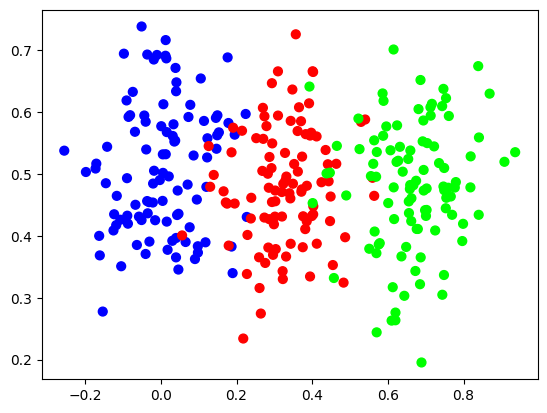

In [ ]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data, vertical_data

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


# Rectified linear Activation function
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities


class Loss():
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss


class Loss_CategoricalCrossEntopy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

X,y = vertical_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CategoricalCrossEntopy()
loss = loss_function.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

plt.scatter(X[:, 0], X[:, 1], c=y, s = 40, cmap='brg')
plt.show()

Loss:  1.0986115
Accuracy:  0.36333333333333334


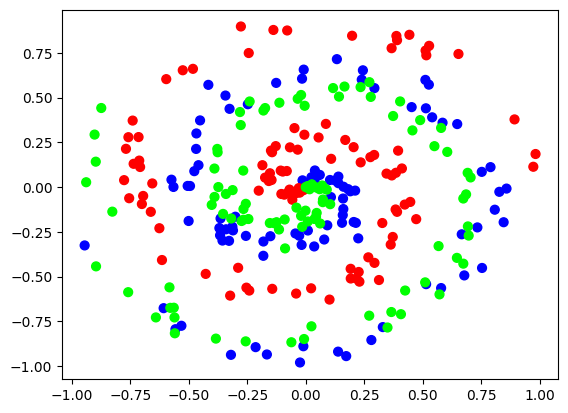

In [ ]:
X,y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CategoricalCrossEntopy()
loss = loss_function.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

plt.scatter(X[:, 0], X[:, 1], c=y, s = 40, cmap='brg')
plt.show()